In [1]:
import pandas as pd
import numpy as np

In [2]:
train_file_path = 'train.xlsx'
test_file_path = 'test.xlsx'

train_df = pd.read_excel(train_file_path)
test_df = pd.read_excel(test_file_path)

# print(train_df)
# print(test_df)

In [3]:
train_df.columns = train_df.iloc[0]
train_df = train_df[1:]
test_df.columns = test_df.iloc[0]
test_df = test_df[1:]
# print(train_df)
# print(test_df)

In [4]:
train_df = train_df.iloc[:, 10:]
test_df = test_df.iloc[:, 10:]
# print(train_df)
# print(test_df)

In [5]:
train_df = train_df.iloc[:, :-1]
test_df = test_df.iloc[:,:-1]
# print(train_df)
# print(test_df)

In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 1 to 1700
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LB        1700 non-null   object
 1   AC        1700 non-null   object
 2   FM        1700 non-null   object
 3   UC        1700 non-null   object
 4   DL        1700 non-null   object
 5   DS        1700 non-null   object
 6   DP        1700 non-null   object
 7   ASTV      1700 non-null   object
 8   MSTV      1700 non-null   object
 9   ALTV      1700 non-null   object
 10  MLTV      1700 non-null   object
 11  Width     1700 non-null   object
 12  Min       1700 non-null   object
 13  Max       1700 non-null   object
 14  Nmax      1700 non-null   object
 15  Nzeros    1700 non-null   object
 16  Mode      1700 non-null   object
 17  Mean      1700 non-null   object
 18  Median    1700 non-null   object
 19  Variance  1700 non-null   object
 20  Tendency  1700 non-null   object
 21  NSP       1700

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [8]:
X_train = train_df.drop('NSP', axis=1) 
X_train = X_train.astype(float)
y_train = train_df['NSP'].astype(int)  

X_test = test_df.drop('NSP', axis=1) 
X_test = X_test.astype(float)
y_test = test_df['NSP'].astype(int)  

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [10]:
print(X_train)
print(y_train)

0           LB        AC        FM        UC   DL   DS   DP      ASTV  \
0     0.925926  0.000000  0.002681  0.345361  0.0  0.0  0.0  0.569444   
1     0.259259  0.648755  0.012147  0.167640  0.0  0.0  0.0  0.388889   
2     0.277778  0.606516  0.018251  0.097953  0.0  0.0  0.0  0.375000   
3     0.277778  0.586619  0.014122  0.075792  0.0  0.0  0.0  0.375000   
4     0.277778  0.590506  0.010769  0.138716  0.0  0.0  0.0  0.375000   
...        ...       ...       ...       ...  ...  ...  ...       ...   
1695  0.629630  0.000000  0.000000  0.497525  0.0  0.0  0.0  0.930556   
1696  0.629630  0.040168  0.000000  0.467080  0.0  0.0  0.0  0.916667   
1697  0.629630  0.050840  0.000000  0.459804  0.0  0.0  0.0  0.930556   
1698  0.629630  0.035205  0.000000  0.409369  0.0  0.0  0.0  0.916667   
1699  0.666667  0.083776  0.003361  0.541195  0.0  0.0  0.0  0.861111   

0         MSTV      ALTV  ...     Width       Min       Max      Nmax  Nzeros  \
0     0.098361  0.032967  ...  0.497175  0

In [11]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
train_y_perd = model.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [13]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           1     0.9986    1.0000    0.9993      1409
           2     1.0000    0.9870    0.9935       154
           3     1.0000    1.0000    1.0000       137

    accuracy                         0.9988      1700
   macro avg     0.9995    0.9957    0.9976      1700
weighted avg     0.9988    0.9988    0.9988      1700

0.9966900224632184


In [14]:
y_pred = model.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [15]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           1     0.8078    0.8374    0.8224       246
           2     0.7519    0.7092    0.7299       141
           3     0.6579    0.6410    0.6494        39

    accuracy                         0.7770       426
   macro avg     0.7392    0.7292    0.7339       426
weighted avg     0.7756    0.7770    0.7759       426

0.7943400743321378


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [17]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [18]:
train_y_perd = XGB.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [19]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      1409
           1     1.0000    0.9870    0.9935       154
           2     1.0000    1.0000    1.0000       137

    accuracy                         0.9988      1700
   macro avg     0.9995    0.9957    0.9976      1700
weighted avg     0.9988    0.9988    0.9988      1700

0.9966900224632184


In [20]:
y_pred = XGB.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [22]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_train, train_y_perd)
cm2=confusion_matrix(y_test,y_pred)

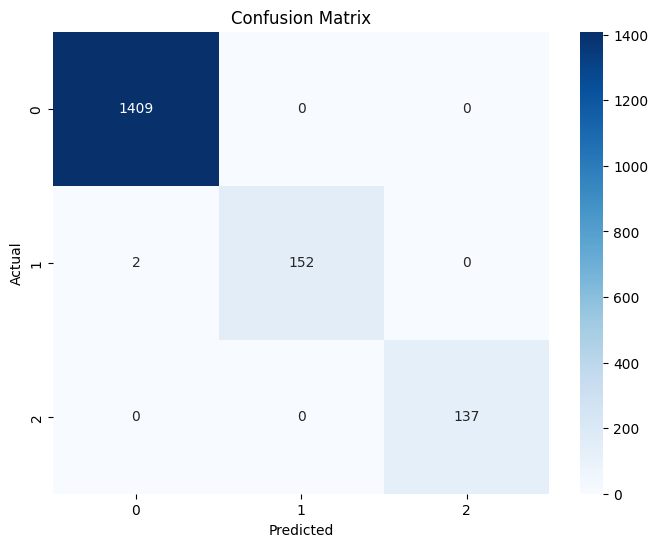

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

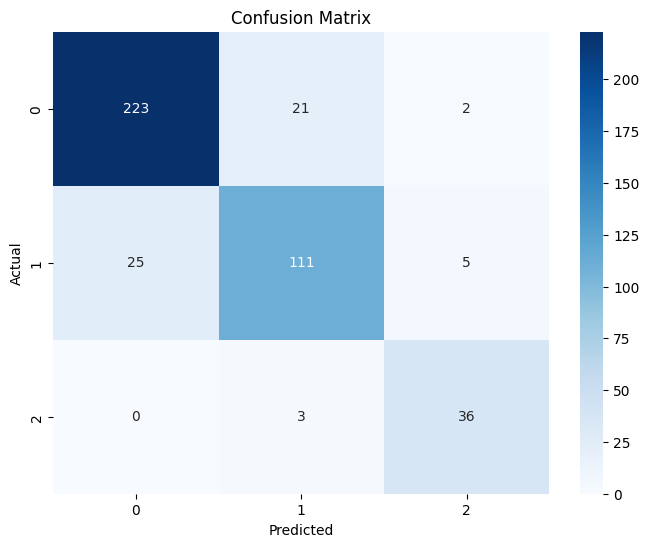

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
print(cm1[0, 0] / (cm1[0, 0] + cm1[0, 1] + cm1[0, 2]))
print(cm2[0, 0] / (cm2[0, 0] + cm2[0, 1] + cm2[0, 2]))

1.0
0.9065040650406504


In [31]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8992    0.9065    0.9028       246
           1     0.8222    0.7872    0.8043       141
           2     0.8372    0.9231    0.8780        39

    accuracy                         0.8685       426
   macro avg     0.8529    0.8723    0.8617       426
weighted avg     0.8680    0.8685    0.8680       426

0.8959379600281547


In [32]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
train_y_perd = RF.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [34]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      1409
           1     1.0000    0.9870    0.9935       154
           2     1.0000    1.0000    1.0000       137

    accuracy                         0.9988      1700
   macro avg     0.9995    0.9957    0.9976      1700
weighted avg     0.9988    0.9988    0.9988      1700

0.9966900224632184


In [35]:
y_pred = RF.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [36]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8281    0.9593    0.8889       246
           1     0.8214    0.6525    0.7273       141
           2     0.7931    0.5897    0.6765        39

    accuracy                         0.8239       426
   macro avg     0.8142    0.7339    0.7642       426
weighted avg     0.8227    0.8239    0.8159       426

0.807278985992561


In [44]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [45]:
train_y_perd = LR.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [46]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9343    0.9886    0.9607      1409
           1     0.6869    0.4416    0.5375       154
           2     0.9273    0.7445    0.8259       137

    accuracy                         0.9194      1700
   macro avg     0.8495    0.7249    0.7747      1700
weighted avg     0.9113    0.9194    0.9115      1700

0.8021314249432984


In [49]:
y_pred = LR.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [50]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8000    0.9268    0.8588       246
           1     0.7107    0.6099    0.6565       141
           2     0.8500    0.4359    0.5763        39

    accuracy                         0.7770       426
   macro avg     0.7869    0.6576    0.6972       426
weighted avg     0.7750    0.7770    0.7659       426

0.7542383600015468


In [51]:
from sklearn.svm import SVC
SVMl = SVC(kernel='linear', random_state=42)
SVMl.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [52]:
train_y_perd = SVMl.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [53]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9370    0.9815    0.9588      1409
           1     0.6571    0.4481    0.5328       154
           2     0.9076    0.7883    0.8438       137

    accuracy                         0.9176      1700
   macro avg     0.8339    0.7393    0.7784      1700
weighted avg     0.9093    0.9176    0.9109      1700

0.8113348394412343


In [56]:
y_pred = SVMl.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [57]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8453    0.9106    0.8767       246
           1     0.7200    0.6383    0.6767       141
           2     0.6667    0.6154    0.6400        39

    accuracy                         0.7934       426
   macro avg     0.7440    0.7214    0.7311       426
weighted avg     0.7875    0.7934    0.7888       426

0.7971098410260794


In [58]:
SVMR = SVC(kernel='rbf', random_state=42)
SVMR.fit(X_train, y_train)

SVC(random_state=42)

In [61]:
train_y_perd = SVMR.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [62]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9419    0.9894    0.9650      1409
           1     0.7182    0.5130    0.5985       154
           2     0.9636    0.7737    0.8583       137

    accuracy                         0.9288      1700
   macro avg     0.8746    0.7587    0.8073      1700
weighted avg     0.9234    0.9288    0.9232      1700

0.8263200365087341


In [63]:
y_pred = SVMR.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [64]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8134    0.9390    0.8717       246
           1     0.7807    0.6312    0.6980       141
           2     0.8929    0.6410    0.7463        39

    accuracy                         0.8099       426
   macro avg     0.8290    0.7371    0.7720       426
weighted avg     0.8098    0.8099    0.8027       426

0.8035566707256422


In [65]:
from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier(random_state=42)
AdaB.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [66]:
train_y_perd = AdaB.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [67]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9623    0.9603    0.9613      1409
           1     0.6860    0.7662    0.7239       154
           2     0.9754    0.8686    0.9189       137

    accuracy                         0.9353      1700
   macro avg     0.8746    0.8650    0.8680      1700
weighted avg     0.9383    0.9353    0.9364      1700

0.8960205977740197


In [68]:
y_pred = AdaB.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [69]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8118    0.8943    0.8511       246
           1     0.7956    0.7730    0.7842       141
           2     0.9444    0.4359    0.5965        39

    accuracy                         0.8122       426
   macro avg     0.8506    0.7011    0.7439       426
weighted avg     0.8186    0.8122    0.8056       426

0.7865155162800587


In [70]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
train_y_perd = KNN.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [72]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9569    0.9922    0.9742      1409
           1     0.8678    0.6818    0.7636       154
           2     0.9576    0.8248    0.8863       137

    accuracy                         0.9506      1700
   macro avg     0.9274    0.8329    0.8747      1700
weighted avg     0.9489    0.9506    0.9481      1700

0.8781309391006836


In [73]:
y_pred = KNN.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [74]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.7872    0.9472    0.8598       246
           1     0.7255    0.5248    0.6091       141
           2     0.7143    0.5128    0.5970        39

    accuracy                         0.7676       426
   macro avg     0.7423    0.6616    0.6886       426
weighted avg     0.7601    0.7676    0.7527       426

0.7526467051233797


In [75]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT = GradientBoostingClassifier(random_state=42)
GBDT.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [80]:
train_y_perd = GBDT.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [81]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9958    0.9993    0.9975      1409
           1     0.9933    0.9610    0.9769       154
           2     1.0000    1.0000    1.0000       137

    accuracy                         0.9959      1700
   macro avg     0.9963    0.9868    0.9915      1700
weighted avg     0.9959    0.9959    0.9959      1700

0.98984397509993


In [82]:
y_pred = GBDT.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [83]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8800    0.8943    0.8871       246
           1     0.8321    0.7730    0.8015       141
           2     0.7556    0.8718    0.8095        39

    accuracy                         0.8521       426
   macro avg     0.8225    0.8464    0.8327       426
weighted avg     0.8527    0.8521    0.8517       426

0.8778116730902913


In [85]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=42)
MLP.fit(X_train,y_train)

D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(random_state=42)

In [86]:
train_y_perd = MLP.predict(X_train)
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

In [87]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9624    0.9808    0.9715      1409
           1     0.7519    0.6494    0.6969       154
           2     0.9313    0.8905    0.9104       137

    accuracy                         0.9435      1700
   macro avg     0.8819    0.8402    0.8596      1700
weighted avg     0.9408    0.9435    0.9417      1700

0.8846714160731651


In [88]:
y_pred = MLP.predict(X_test)
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

In [89]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8819    0.8496    0.8654       246
           1     0.7021    0.7021    0.7021       141
           2     0.6042    0.7436    0.6667        39

    accuracy                         0.7911       426
   macro avg     0.7294    0.7651    0.7447       426
weighted avg     0.7969    0.7911    0.7932       426

0.8238818858759736


In [164]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

ANN = Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

custom_optimizer = Adam(learning_rate=0.001) 
# 编译模型
ANN.compile(optimizer=custom_optimizer,  # 优化器
              loss='categorical_crossentropy',  # 损失函数，适用于多类别分类
              metrics=['accuracy'])  # 评估指标

In [165]:
ANN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 128)               2816      
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 3)                 99        
                                                                 
Total params: 13,251
Trainable params: 13,251
Non-trainable params: 0
_________________________________________________________________


In [166]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = ANN.fit(X_train, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
22/22 [==============================] - 1s 8ms/step - loss: 0.8284 - accuracy: 0.7816 - val_loss: 0.5794 - val_accuracy: 0.8235
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.8301 - val_loss: 0.5460 - val_accuracy: 0.8235
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8449 - val_loss: 0.4283 - val_accuracy: 0.8059
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8853 - val_loss: 0.3902 - val_accuracy: 0.8676
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9015 - val_loss: 0.4278 - val_accuracy: 0.8294
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.9110 - val_loss: 0.4114 - val_accuracy: 0.8176
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9110 - val_loss: 0.3872 - val_accuracy: 0.8294
Epoch 8/100
2

In [167]:
train_y_perd = ANN.predict(X_train)
train_y_perd = tf.argmax(train_y_perd, axis=1)  # 将概率转换为类别
report = classification_report(y_train, train_y_perd,digits=4)
macro_auc = roc_auc_score(pd.get_dummies(y_train), pd.get_dummies(train_y_perd), multi_class='ovr', average='macro')

54/54 [==============================] - 0s 715us/step


In [168]:
print(report)
print(macro_auc)

              precision    recall  f1-score   support

           0     0.9522    0.9475    0.9498      1409
           1     0.5506    0.5649    0.5577       154
           2     0.8071    0.8248    0.8159       137

    accuracy                         0.9029      1700
   macro avg     0.7700    0.7791    0.7745      1700
weighted avg     0.9041    0.9029    0.9035      1700

0.8406321793565773


In [169]:
y_pred = ANN.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)  # 将概率转换为类别
rep = classification_report(y_test,y_pred,digits=4)
auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr', average='macro')

14/14 [==============================] - 0s 844us/step


In [170]:
print(rep)
print(auc)

              precision    recall  f1-score   support

           0     0.8707    0.9309    0.8998       246
           1     0.8017    0.6879    0.7405       141
           2     0.7381    0.7949    0.7654        39

    accuracy                         0.8380       426
   macro avg     0.8035    0.8046    0.8019       426
weighted avg     0.8357    0.8380    0.8348       426

0.852031029735289


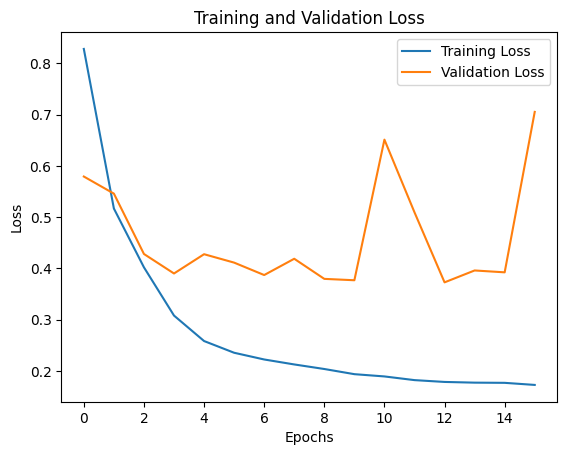

In [171]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()